# SURVIVAL ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Obituaries dataset
Ob=pd.read_csv("C:/Users/Me/Desktop/Data Science/I&M BANK/ObituariesDataset.csv",parse_dates=True,thousands=",",index_col=[0])

In [3]:
# Top 6 of dataset
Ob.head(5)

,Announcement,Death,Burial,Burial_Day,Burial_Week,Gender,Age,Color,Size,Word_Count,...,Morgue,Same_Morgue,Cost_Morgue,Occupation,Repetition,Corporate,Corporate_Name,Residence,Residence_Name,Residence_Category
Name,,,,,,,,,,,,,,,,,,,,,
Eng. Paul Chemweno,11/8/2017,11/2/2017,11/17/2017,Friday,Weekday,Male,66.0,Yes,55.18,179.0,...,MTRH Eldoret,No,NaN,Director,NaN,NaN,NaN,NaN,NaN,NaN
Edith Kiende Kiogora,11/8/2017,10/27/2017,11/11/2017,Saturday,Weekend,Female,43.0,Yes,83.60,293.0,...,Chogoria Hospital Mortuary,No,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
Simon Muchiri Ngigii Mbaria,11/8/2017,11/1/2017,11/8/2017,Wednesday,Weekday,Male,35.0,Yes,109.12,206.0,...,Umash Nakuru,No,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
Mwalimu Erick Namusasi Werunga,11/8/2017,10/24/2017,11/9/2017,Thursday,Weekday,Male,54.0,Yes,83.60,171.0,...,Maida Mortuary,NaN,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
Catherine Mueni Sina,11/8/2017,11/2/2017,11/11/2017,Saturday,Weekend,Female,41.0,No,55.18,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Columns of the dataset
Ob.columns

Index(['Announcement', 'Death', 'Burial', 'Burial_Day', 'Burial_Week',
       'Gender', 'Age', 'Color', 'Size', 'Word_Count', 'No_of_Children',
       'Significant_Children', 'Significant_Relatives', 'Fundraising',
       'Death_to_Announce', 'Death_to_Burial', 'Announce_to_Burial',
       'No_of_Relatives', 'County_Burial', 'County_Death', 'County_Morgue',
       'Distance_Death', 'Distance_Morgue', 'Cause_of_Death', 'Married',
       'Spouse_Alive', 'Spouse_gender', 'Hospital', 'Morgue', 'Same_Morgue',
       'Cost_Morgue', 'Occupation', 'Repetition', 'Corporate',
       'Corporate_Name', 'Residence', 'Residence_Name', 'Residence_Category'],
      dtype='object')

In [5]:
Ob.shape

(1291, 38)

In [6]:
# Slice the dataset
Ob_s=Ob.loc[:,["Death","Burial","Spouse_gender","Death_to_Burial"]]

In [7]:
Ob_s.head(4)

,Death,Burial,Spouse_gender,Death_to_Burial
Name,,,,
Eng. Paul Chemweno,11/2/2017,11/17/2017,Female,15
Edith Kiende Kiogora,10/27/2017,11/11/2017,Male,15
Simon Muchiri Ngigii Mbaria,11/1/2017,11/8/2017,Female,7
Mwalimu Erick Namusasi Werunga,10/24/2017,11/9/2017,Female,16


In [8]:
Ob_s.tail(4)

,Death,Burial,Spouse_gender,Death_to_Burial
Name,,,,
Mama Agnes Omwenga Nyakundi,3/12/2017,3/24/2017,Male,12
Mrs Jane Wanjiru Kaniu(Nyina Wa Andu),3/11/2017,3/22/2017,Male,11
Snr. Insp. Of Police Betty Cherono Soi,NaN,3/18/2017,NaN,"42,812"
Mzee Muliko Kimanga,3/12/2017,3/18/2017,Female,6


In [9]:
Ob_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, Eng. Paul Chemweno to Mzee Muliko Kimanga
Data columns (total 4 columns):
Death              893 non-null object
Burial             1164 non-null object
Spouse_gender      935 non-null object
Death_to_Burial    1244 non-null object
dtypes: object(4)
memory usage: 50.4+ KB


In [10]:
Ob_s["Death_to_Burial"].fillna(value=Ob_s["Death_to_Burial"].mode(),inplace=True)

In [11]:
Ob_s["Spouse_gender"].fillna(value=Ob_s["Spouse_gender"].mode(),inplace=True)

In [12]:
Ob_s["Death_to_Burial"] = pd.to_numeric(Ob_s["Death_to_Burial"],errors="coerce") # They are number of days
Ob_s["Spouse_gender"]=pd.Categorical(Ob_s["Spouse_gender"])# Due to classification Male/Female
Ob_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, Eng. Paul Chemweno to Mzee Muliko Kimanga
Data columns (total 4 columns):
Death              893 non-null object
Burial             1164 non-null object
Spouse_gender      935 non-null category
Death_to_Burial    904 non-null float64
dtypes: category(1), float64(1), object(2)
memory usage: 41.7+ KB


In [13]:
Ob_s.fillna(method="ffill",inplace=True)

In [14]:
Ob_s["Spouse_gender"].unique()

[Female, Male, None]
Categories (3, object): [Female, Male, None]

In [15]:
Ob_s["Spouse_gender"].mode()

0    Female
Name: Spouse_gender, dtype: category
Categories (3, object): [Female, Male, None]

In [16]:
Ob_s["Spouse_gender"].replace(to_replace="None", value="Female",inplace=True)

In [17]:
Ob_s["Spouse_gender"].unique()

[Female, Male]
Categories (2, object): [Female, Male]

In [18]:
Ob_s.describe()

,Death_to_Burial
count,1291.000000
mean,9.008521
std,10.679071
min,-292.000000
25%,6.000000
50%,8.000000
75%,12.000000
max,94.000000


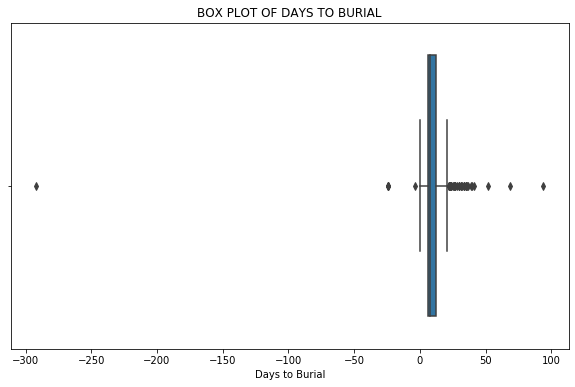

In [19]:
# Check outlier
plt.figure(figsize=(10,6))
sns.boxplot(Ob_s["Death_to_Burial"])
plt.title("BOX PLOT OF DAYS TO BURIAL")
plt.xlabel("Days to Burial")
plt.show()

In [20]:
Ob_s=Ob_s[Ob_s["Death_to_Burial"]>=0]

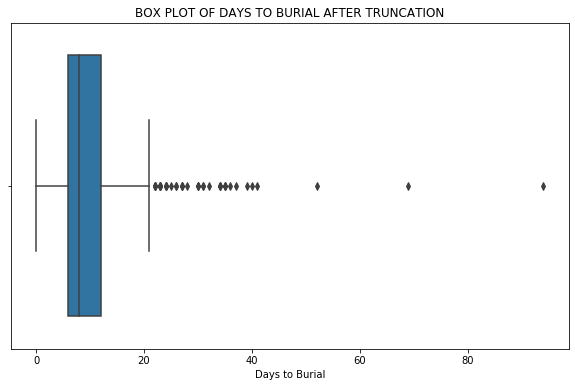

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(Ob_s["Death_to_Burial"])
plt.title("BOX PLOT OF DAYS TO BURIAL AFTER TRUNCATION")
plt.xlabel("Days to Burial")
plt.show()

In [22]:
# Maximum and Minimum number of days
Ob_s["Death_to_Burial"].max(),Ob_s["Death_to_Burial"].min()

(94.0, 0.0)

In [23]:
Ob_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1285 entries, Eng. Paul Chemweno to Mzee Muliko Kimanga
Data columns (total 4 columns):
Death              1285 non-null object
Burial             1285 non-null object
Spouse_gender      1285 non-null category
Death_to_Burial    1285 non-null float64
dtypes: category(1), float64(1), object(2)
memory usage: 41.5+ KB


# Kaplein Meier

In [24]:
#Use of lifelines
from lifelines import KaplanMeierFitter

In [25]:
# Encode gender
from sklearn import preprocessing
encode= preprocessing.LabelEncoder()
Ob_s["Spouse_gender_enc"]=encode.fit_transform(Ob_s["Spouse_gender"])

In [26]:
Ob_s.Spouse_gender_enc.max(),Ob_s.Spouse_gender_enc.min()

(1, 0)

In [27]:
Ob_s.head(5)

,Death,Burial,Spouse_gender,Death_to_Burial,Spouse_gender_enc
Name,,,,,
Eng. Paul Chemweno,11/2/2017,11/17/2017,Female,15.0,0
Edith Kiende Kiogora,10/27/2017,11/11/2017,Male,15.0,1
Simon Muchiri Ngigii Mbaria,11/1/2017,11/8/2017,Female,7.0,0
Mwalimu Erick Namusasi Werunga,10/24/2017,11/9/2017,Female,16.0,0
Catherine Mueni Sina,11/2/2017,11/11/2017,Male,9.0,1


In [28]:
Ob_s.tail(5)

,Death,Burial,Spouse_gender,Death_to_Burial,Spouse_gender_enc
Name,,,,,
Faith Wangui Mwathi,3/13/2017,3/18/2017,Male,5.0,1
Mama Agnes Omwenga Nyakundi,3/12/2017,3/24/2017,Male,12.0,1
Mrs Jane Wanjiru Kaniu(Nyina Wa Andu),3/11/2017,3/22/2017,Male,11.0,1
Snr. Insp. Of Police Betty Cherono Soi,3/11/2017,3/18/2017,Male,11.0,1
Mzee Muliko Kimanga,3/12/2017,3/18/2017,Female,6.0,0


In [29]:
km= KaplanMeierFitter()

In [30]:
time=Ob_s["Death_to_Burial"]
spouse=Ob_s["Spouse_gender_enc"]

In [31]:
time.head()

Name
Eng. Paul Chemweno                15.0
Edith Kiende Kiogora              15.0
Simon Muchiri Ngigii Mbaria        7.0
Mwalimu Erick Namusasi Werunga    16.0
Catherine Mueni Sina               9.0
Name: Death_to_Burial, dtype: float64

In [32]:
spouse.head()

Name
Eng. Paul Chemweno                0
Edith Kiende Kiogora              1
Simon Muchiri Ngigii Mbaria       0
Mwalimu Erick Namusasi Werunga    0
Catherine Mueni Sina              1
Name: Spouse_gender_enc, dtype: int32

In [33]:
Ob_s.info(5)

<class 'pandas.core.frame.DataFrame'>
Index: 1285 entries, Eng. Paul Chemweno to Mzee Muliko Kimanga
Data columns (total 5 columns):
Death                1285 non-null object
Burial               1285 non-null object
Spouse_gender        1285 non-null category
Death_to_Burial      1285 non-null float64
Spouse_gender_enc    1285 non-null int32
dtypes: category(1), float64(1), int32(1), object(2)
memory usage: 46.5+ KB


#Kaplain Meier plots for gender of spouse associated with number of days taken to burial day of the deceased.

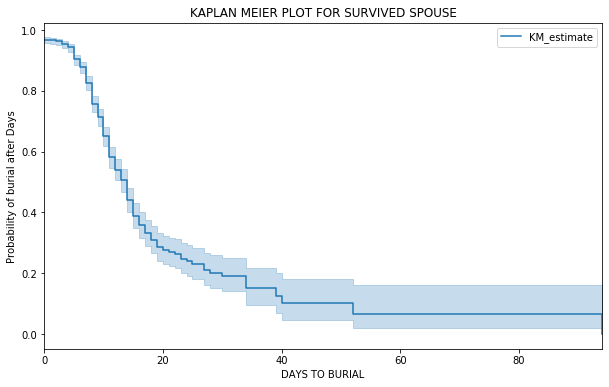

In [34]:
km.fit(time,spouse)
km.plot(ci_show=True,figsize=(10,6))
plt.title("KAPLAN MEIER PLOT FOR SURVIVED SPOUSE")
plt.ylabel("Probability of burial after Days")
plt.xlabel("DAYS TO BURIAL")
plt.gcf()
plt.show()

In [35]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(km.confidence_interval_)
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,13.0,14.0


In [36]:
Ob_s["Spouse_gender"].unique()

[Female, Male]
Categories (2, object): [Female, Male]

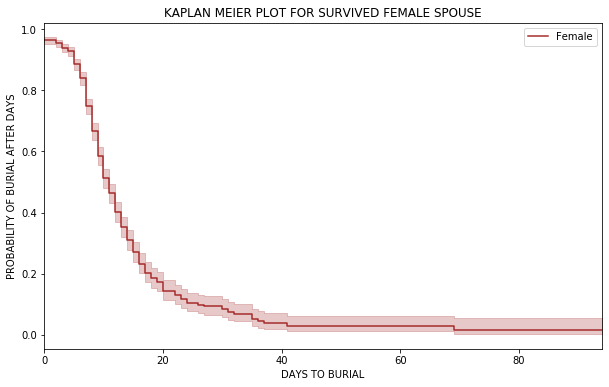

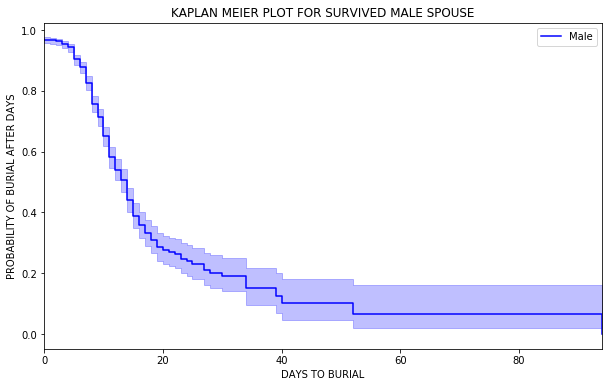

In [37]:
# Plot Male and Female live Spouses KM plot
for sex in Ob_s["Spouse_gender_enc"].unique():
    if sex==1:
        label="Male" # Label for encode 1 is Male
        km.fit(time,spouse==sex,label=label)
        km.plot(figsize=(10,6),color="blue")
        plt.title("KAPLAN MEIER PLOT FOR SURVIVED MALE SPOUSE")
    else:
        label="Female" # Label for encode 0 is Female
        km.fit(time,spouse==sex,label=label)
        km.plot(figsize=(10,6),color="brown")
        plt.title("KAPLAN MEIER PLOT FOR SURVIVED FEMALE SPOUSE")
    plt.ylabel("PROBABILITY OF BURIAL AFTER DAYS")
    plt.xlabel("DAYS TO BURIAL")
    plt.gcf()
    
    plt.show()

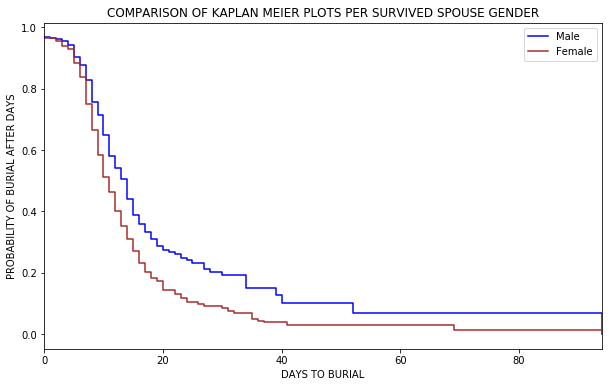

In [38]:
# Comparison Plot Male and Female Spouses KM plot
ax=plt.subplots(1)

km.fit(time,spouse==1,label="Male")
fig=km.plot(ci_show=False,figsize=(10,6),color="blue")

km.fit(time,spouse==0,label="Female")
km.plot(ci_show=False,figsize=(10,6),color="brown",ax=fig)

plt.title("COMPARISON OF KAPLAN MEIER PLOTS PER SURVIVED SPOUSE GENDER")
plt.ylabel("PROBABILITY OF BURIAL AFTER DAYS")
plt.xlabel("DAYS TO BURIAL")
plt.gcf()

plt.show()

##########
B: Predict deaths that are likely to need fundraising. Use algorithm of your own choice. Include the confusion matrix, F1 score, sensitivity, and specificity.

In [39]:
#Top 5 rows
Ob.head(5)

,Announcement,Death,Burial,Burial_Day,Burial_Week,Gender,Age,Color,Size,Word_Count,...,Morgue,Same_Morgue,Cost_Morgue,Occupation,Repetition,Corporate,Corporate_Name,Residence,Residence_Name,Residence_Category
Name,,,,,,,,,,,,,,,,,,,,,
Eng. Paul Chemweno,11/8/2017,11/2/2017,11/17/2017,Friday,Weekday,Male,66.0,Yes,55.18,179.0,...,MTRH Eldoret,No,NaN,Director,NaN,NaN,NaN,NaN,NaN,NaN
Edith Kiende Kiogora,11/8/2017,10/27/2017,11/11/2017,Saturday,Weekend,Female,43.0,Yes,83.60,293.0,...,Chogoria Hospital Mortuary,No,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
Simon Muchiri Ngigii Mbaria,11/8/2017,11/1/2017,11/8/2017,Wednesday,Weekday,Male,35.0,Yes,109.12,206.0,...,Umash Nakuru,No,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
Mwalimu Erick Namusasi Werunga,11/8/2017,10/24/2017,11/9/2017,Thursday,Weekday,Male,54.0,Yes,83.60,171.0,...,Maida Mortuary,NaN,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
Catherine Mueni Sina,11/8/2017,11/2/2017,11/11/2017,Saturday,Weekend,Female,41.0,No,55.18,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Checking missing values
Ob.isnull().sum()

Announcement               26
Death                     398
Burial                    127
Burial_Day                128
Burial_Week               128
Gender                      0
Age                       784
Color                       2
Size                       54
Word_Count                 54
No_of_Children            198
Significant_Children      199
Significant_Relatives     208
Fundraising               149
Death_to_Announce           0
Death_to_Burial            47
Announce_to_Burial         13
No_of_Relatives           230
County_Burial             247
County_Death              766
County_Morgue             411
Distance_Death            805
Distance_Morgue           420
Cause_of_Death            493
Married                   243
Spouse_Alive              348
Spouse_gender             356
Hospital                 1024
Morgue                    426
Same_Morgue              1088
Cost_Morgue              1289
Occupation               1040
Repetition               1224
Corporate 

In [41]:
Ob=Ob.drop(columns=["Announcement","Death","Burial","Residence_Category","Residence_Name","Residence","Corporate_Name","Corporate","Repetition","Cost_Morgue"])

In [42]:
Ob.columns # Columns used

Index(['Burial_Day', 'Burial_Week', 'Gender', 'Age', 'Color', 'Size',
       'Word_Count', 'No_of_Children', 'Significant_Children',
       'Significant_Relatives', 'Fundraising', 'Death_to_Announce',
       'Death_to_Burial', 'Announce_to_Burial', 'No_of_Relatives',
       'County_Burial', 'County_Death', 'County_Morgue', 'Distance_Death',
       'Distance_Morgue', 'Cause_of_Death', 'Married', 'Spouse_Alive',
       'Spouse_gender', 'Hospital', 'Morgue', 'Same_Morgue', 'Occupation'],
      dtype='object')

In [43]:
Ob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, Eng. Paul Chemweno to Mzee Muliko Kimanga
Data columns (total 28 columns):
Burial_Day               1163 non-null object
Burial_Week              1163 non-null object
Gender                   1291 non-null object
Age                      507 non-null float64
Color                    1289 non-null object
Size                     1237 non-null float64
Word_Count               1237 non-null float64
No_of_Children           1093 non-null float64
Significant_Children     1092 non-null float64
Significant_Relatives    1083 non-null float64
Fundraising              1142 non-null object
Death_to_Announce        1291 non-null object
Death_to_Burial          1244 non-null object
Announce_to_Burial       1278 non-null object
No_of_Relatives          1061 non-null object
County_Burial            1044 non-null object
County_Death             525 non-null object
County_Morgue            880 non-null object
Distance_Death           486 non-nu

In [44]:
for column in Ob.columns:
    
    if Ob[column].dtypes!=object:
        print(column)

Age
Size
Word_Count
No_of_Children
Significant_Children
Significant_Relatives
Distance_Death


In [45]:
Ob_new=Ob.copy()

In [46]:
Column_n=Ob.drop(columns=["Age",
                "Size",
                "Word_Count",
                "No_of_Children",
                "Significant_Children",
                "Significant_Relatives",
                "Distance_Death"])
Column_n.columns

Index(['Burial_Day', 'Burial_Week', 'Gender', 'Color', 'Fundraising',
       'Death_to_Announce', 'Death_to_Burial', 'Announce_to_Burial',
       'No_of_Relatives', 'County_Burial', 'County_Death', 'County_Morgue',
       'Distance_Morgue', 'Cause_of_Death', 'Married', 'Spouse_Alive',
       'Spouse_gender', 'Hospital', 'Morgue', 'Same_Morgue', 'Occupation'],
      dtype='object')

In [47]:
# Replace Null values with 0
Ob_new=Ob_new.replace(np.nan,0)

In [48]:
# Convert to string and encode
for new_col in Column_n.columns:
    Ob_new[new_col]=Ob_new[new_col].astype(str)
    Ob_new[new_col]=encode.fit_transform(Ob_new[new_col])

In [49]:
Ob_new.isnull().sum() #Re-check missin values

Burial_Day               0
Burial_Week              0
Gender                   0
Age                      0
Color                    0
Size                     0
Word_Count               0
No_of_Children           0
Significant_Children     0
Significant_Relatives    0
Fundraising              0
Death_to_Announce        0
Death_to_Burial          0
Announce_to_Burial       0
No_of_Relatives          0
County_Burial            0
County_Death             0
County_Morgue            0
Distance_Death           0
Distance_Morgue          0
Cause_of_Death           0
Married                  0
Spouse_Alive             0
Spouse_gender            0
Hospital                 0
Morgue                   0
Same_Morgue              0
Occupation               0
dtype: int64

In [50]:
Ob_new.head(4)

,Burial_Day,Burial_Week,Gender,Age,Color,Size,Word_Count,No_of_Children,Significant_Children,Significant_Relatives,...,Distance_Death,Distance_Morgue,Cause_of_Death,Married,Spouse_Alive,Spouse_gender,Hospital,Morgue,Same_Morgue,Occupation
Name,,,,,,,,,,,,,,,,,,,,,
Eng. Paul Chemweno,1,2,1,66.0,2,55.18,179.0,7.0,0.0,0.0,...,0.0,0,7,2,3,1,67,152,2,28
Edith Kiende Kiogora,3,4,0,43.0,2,83.60,293.0,4.0,0.0,7.0,...,224.0,0,7,2,3,2,84,34,2,103
Simon Muchiri Ngigii Mbaria,7,2,1,35.0,2,109.12,206.0,4.0,0.0,2.0,...,0.0,159,7,2,3,1,14,311,2,103
Mwalimu Erick Namusasi Werunga,5,2,1,54.0,2,83.60,171.0,4.0,0.0,0.0,...,0.0,0,7,2,1,1,0,158,0,103


In [51]:
# Split original train and test dataframes
test_original=Ob_new[Ob_new.Fundraising==0]
train_original=Ob_new[Ob_new.Fundraising!=0]

#TRAIN TEST AND SPLIT (Using Train_original DataFrame)

In [52]:
from sklearn.model_selection import train_test_split
x=train_original.drop(columns="Fundraising")
y=train_original["Fundraising"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=20)

# Predictions

#Logistic regression

In [53]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [54]:
from sklearn import linear_model

In [55]:
log_model = linear_model.LogisticRegression(solver="lbfgs",max_iter=4000)

# Train the model
log_model.fit(X = pd.DataFrame(x_train), 
              y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# View summary of common classification metrics
logt_pred=log_model.predict(x_test)
print(metrics.classification_report(y_test,logt_pred))

              precision    recall  f1-score   support

           1       0.51      0.49      0.50        83
           2       0.72      0.73      0.72       146

    accuracy                           0.64       229
   macro avg       0.61      0.61      0.61       229
weighted avg       0.64      0.64      0.64       229



In [57]:
# Confusion matrix
log_con=metrics.confusion_matrix(y_test,logt_pred)
print("Confusion Matrix :\n",log_con)
print("CrossTab")
pd.crosstab(y_test,logt_pred)

Confusion Matrix :
 [[ 41  42]
 [ 40 106]]
CrossTab


col_0,1,2
Fundraising,,
1,41,42
2,40,106


In [58]:
print("Accuracy score:\n",accuracy_score(y_test,logt_pred))

Accuracy score:
 0.6419213973799127


In [59]:
print("Specificity :")
log_specificity=log_con[1,1]/(log_con[1,1]+log_con[1,0])
print(log_specificity)
print("Sensitivity :")
log_sensitivity=log_con[0,0]/(log_con[0,0]+log_con[0,1])
print(log_sensitivity)

Specificity :
0.726027397260274
Sensitivity :
0.4939759036144578


#Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
# Train the model
tree_model=DecisionTreeClassifier()
tree_model.fit(X = pd.DataFrame(x_train), y = y_train)
tree_pred=tree_model.predict(x_test)
print(metrics.classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           1       0.61      0.64      0.62        83
           2       0.79      0.77      0.78       146

    accuracy                           0.72       229
   macro avg       0.70      0.70      0.70       229
weighted avg       0.72      0.72      0.72       229



In [62]:
# Confusion matrix
print("Confusion Matrix:\n")
tree_con=metrics.confusion_matrix(y_test,tree_pred)
print(tree_con)
print("CrossTab:\n")
pd.crosstab(y_test,tree_pred)

Confusion Matrix:

[[ 53  30]
 [ 34 112]]
CrossTab:



col_0,1,2
Fundraising,,
1,53,30
2,34,112


In [63]:
print("Tree Accuracy score:\n",accuracy_score(y_test,tree_pred))

Tree Accuracy score:
 0.7205240174672489


In [64]:
print("Specificity :\n")
tree_specificity=tree_con[1,1]/(tree_con[1,1]+tree_con[1,0])
print(tree_specificity)
print("Sensitivity :\n")
tree_sensitivity=tree_con[0,0]/(tree_con[0,0]+tree_con[0,1])
print(tree_sensitivity)

Specificity :

0.7671232876712328
Sensitivity :

0.6385542168674698


#Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier as RF
# Train the model
forest = RF(n_estimators=500,
             max_features= None) 
forest.fit(X= x_train,y= y_train)
forest_pred = forest.predict(x_test)
print(metrics.classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           1       0.68      0.76      0.72        83
           2       0.85      0.79      0.82       146

    accuracy                           0.78       229
   macro avg       0.77      0.78      0.77       229
weighted avg       0.79      0.78      0.78       229



In [66]:
print("Forest Accuracy score:\n",accuracy_score(y_test,forest_pred))

Forest Accuracy score:
 0.7816593886462883


In [67]:
# Confusion matrix
print("Confusion Matrix")
forest_con=metrics.confusion_matrix(y_test,forest_pred)
print(forest_con)
print("CrossTab")
pd.crosstab(y_test,forest_pred)

Confusion Matrix
[[ 63  20]
 [ 30 116]]
CrossTab


col_0,1,2
Fundraising,,
1,63,20
2,30,116


In [68]:
print("Specificity :\n")
forest_specificity=forest_con[1,1]/(forest_con[1,1]+forest_con[1,0])
print(forest_specificity)
print("Sensitivity :\n")
forest_sensitivity=forest_con[0,0]/(forest_con[0,0]+forest_con[0,1])
print(forest_sensitivity)

Specificity :

0.7945205479452054
Sensitivity :

0.7590361445783133


In [69]:
# Predict the Test original dataset using the Random Forest Classifier

In [70]:
x_test_original=test_original.drop(columns=["Fundraising"])
y_test_original=forest.predict(x_test_original)

# Convert the predicted to dataframe
y_test_original=pd.DataFrame(y_test_original)


In [71]:
# Rename predicted column
y_test_original.rename(columns={0:"Fundraising_Predict"},inplace=True)
y_test_original.head(5)

,Fundraising_Predict
0,2
1,2
2,1
3,2
4,1


In [72]:
Ob_new["Fundraising"].head(), Ob["Fundraising"].head()

(Name
 Eng. Paul Chemweno                2
 Edith Kiende Kiogora              2
 Simon Muchiri Ngigii Mbaria       1
 Mwalimu Erick Namusasi Werunga    1
 Catherine Mueni Sina              0
 Name: Fundraising, dtype: int32, Name
 Eng. Paul Chemweno                Yes
 Edith Kiende Kiogora              Yes
 Simon Muchiri Ngigii Mbaria        No
 Mwalimu Erick Namusasi Werunga     No
 Catherine Mueni Sina              NaN
 Name: Fundraising, dtype: object)

In [73]:
# Rename encoded values to original labels
y_test_original["Fundraising_Predict"].replace(to_replace=2, value="Yes",inplace=True)
y_test_original["Fundraising_Predict"].replace(to_replace=1, value="No",inplace=True)
y_test_original.head(5)

,Fundraising_Predict
0,Yes
1,Yes
2,No
3,Yes
4,No


In [74]:
#Reseting index for concatenation
test_original=test_original.reset_index()

In [75]:
test_original.head(5)

,Name,Burial_Day,Burial_Week,Gender,Age,Color,Size,Word_Count,No_of_Children,Significant_Children,...,Distance_Death,Distance_Morgue,Cause_of_Death,Married,Spouse_Alive,Spouse_gender,Hospital,Morgue,Same_Morgue,Occupation
0,Catherine Mueni Sina,3,4,0,41.0,1,55.18,150.0,1.0,0.0,...,378.0,0,3,0,0,2,0,0,0,0
1,Leah Wanjiru Gaceru Kiratu,6,2,0,0.0,2,85.44,199.0,10.0,9.0,...,0.0,0,0,2,1,2,0,0,0,0
2,Marvin Eldon Isoe Misonge,1,2,1,24.0,2,84.95,192.0,0.0,0.0,...,10000.0,0,0,1,2,3,0,0,0,0
3,Ruy Mwendwa Mututo (Ndilah),0,0,1,0.0,2,55.44,110.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,Julia Wanjiru Githure,6,2,0,85.0,2,54.56,252.0,0.0,0.0,...,0.0,0,0,2,0,0,0,0,0,0


In [76]:
Predicted=pd.concat([test_original,y_test_original],axis=1,sort=False)
Predicted.head(5)

,Name,Burial_Day,Burial_Week,Gender,Age,Color,Size,Word_Count,No_of_Children,Significant_Children,...,Distance_Morgue,Cause_of_Death,Married,Spouse_Alive,Spouse_gender,Hospital,Morgue,Same_Morgue,Occupation,Fundraising_Predict
0,Catherine Mueni Sina,3,4,0,41.0,1,55.18,150.0,1.0,0.0,...,0,3,0,0,2,0,0,0,0,Yes
1,Leah Wanjiru Gaceru Kiratu,6,2,0,0.0,2,85.44,199.0,10.0,9.0,...,0,0,2,1,2,0,0,0,0,Yes
2,Marvin Eldon Isoe Misonge,1,2,1,24.0,2,84.95,192.0,0.0,0.0,...,0,0,1,2,3,0,0,0,0,No
3,Ruy Mwendwa Mututo (Ndilah),0,0,1,0.0,2,55.44,110.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Yes
4,Julia Wanjiru Githure,6,2,0,85.0,2,54.56,252.0,0.0,0.0,...,0,0,2,0,0,0,0,0,0,No


In [77]:
# Final Submission
Predicted.to_csv("FundraisingPrediction.csv")

In [78]:
# END